### ASTR 8070: Astrostatistics
***N. Pol***
___

# Homework 9
### Due: Friday, Apr 18th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

Answer
1)  $$f(z) = z = w_1x_1 + w_2x_2 + b$$

    Based on this equation, this model **cannot** learn any nonlinearities. The output is a linear combination of the inputs, plus a constant bias. This means that the value will always be linear.

2)  With the increase in neurons and the allowed nonlinear activation the model sfor each neuron is still linear but they have a nonlinear boundary. The model sometimes does get stuck making it not always effective at modeling the data.

3)  It can model the data effectively, but it is not always perform optimally either getting stuck at a local minima or converging slowly because the weights are randomly created for initialization.

4)   The smallest number of neurons and hidden layers is one neuron, one layer, and nonlinear activation can get a test loss of 0.177 or less, but it is inconsistent. If you wanrt to get a consistent test loss of 0.177 or less you need two neurons, one layer, and nonlinear activation.

5)    Increasing the model size seems to increase the frequency of getting an effective or good model. Larger models have a more complex loss landscape, which can sometimes lead to getting stuck in poor local minima. While they have the potential for better performance, they might also be more sensitive to the initial conditions and require more careful tuning of hyperparameters like the learning rate. 


## Problem 2

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd


In [18]:
# Part 1
data = np.load('C:/Users/jeell/OneDrive/Documents/GitHub/ASTR_3300_S2025/coursework/homeworks/hw_data/hw8_data_1.npy')
reduced_data = data[::10]

ug = reduced_data['u'] - reduced_data['g']
gr = reduced_data['g'] - reduced_data['r']
ri = reduced_data['r'] - reduced_data['i']
iz = reduced_data['i'] - reduced_data['z']
rs = reduced_data['z']
s_c = reduced_data['specClass']

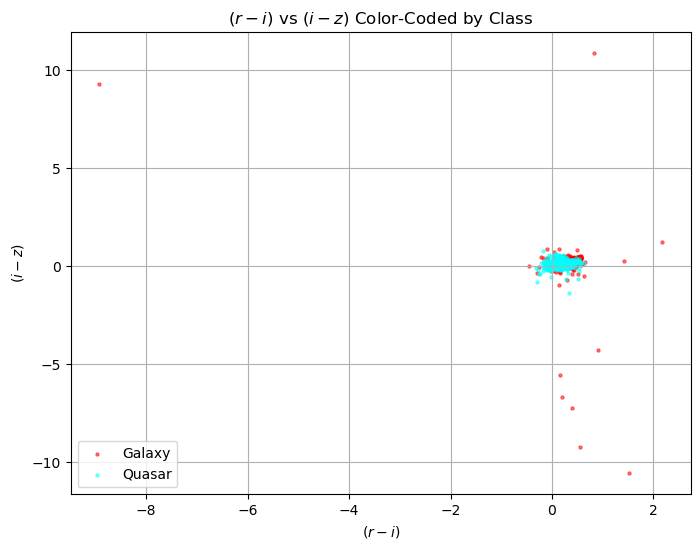

In [22]:
# Part 2

plt.figure(figsize=(8, 6))
g_m = s_c == 'GALAXY'
q_m = s_c == 'QSO'
plt.scatter(ri[g_m], iz[g_m], label='Galaxy', s=5, alpha=0.5, c = 'red')
plt.scatter(ri[q_m], iz[q_m], label='Quasar', s=5, alpha=0.5, c = 'cyan')
plt.xlabel('$(r-i)$')
plt.ylabel('$(i-z)$')
plt.title('$(r-i)$ vs $(i-z)$ Color-Coded by Class')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Part 3

X = np.vstack([ri, iz]).T
y = (s_c == 'QSO').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Part 4

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

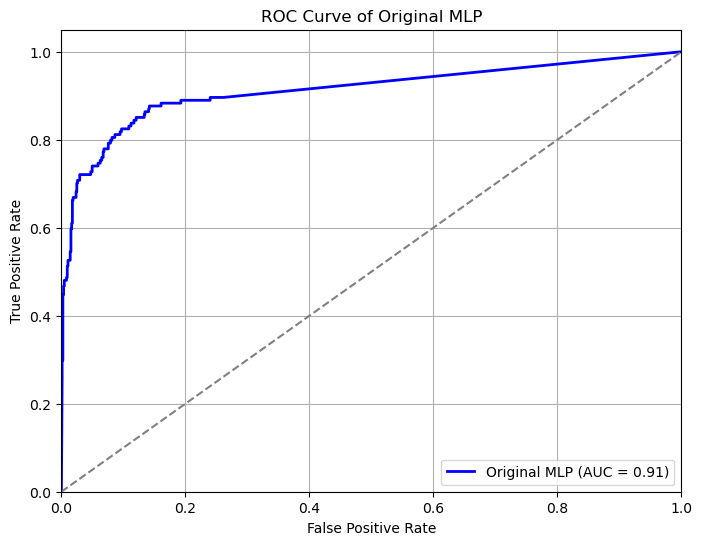

In [28]:
# Part 5

mlp_orig = MLPClassifier(hidden_layer_sizes=(5, 2), activation='relu', solver='sgd',
                         max_iter=1000, random_state=42)
mlp_orig.fit(X_train_scaled, y_train)

y_proba_orig = mlp_orig.predict_proba(X_test_scaled)[:, 1]
fpr_orig, tpr_orig, _ = roc_curve(y_test, y_proba_orig)
auc_orig = auc(fpr_orig, tpr_orig)

plt.figure(figsize=(8, 6))
plt.plot(fpr_orig, tpr_orig, color='blue', lw=2, label=f'Original MLP (AUC = {auc_orig:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Original MLP')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [30]:
# Part 6

parameters = {'solver': ['lbfgs', 'sgd', 'adam'],
              'hidden_layer_sizes': [(2, 2), (5, 5), (5, 2), (5, 5, 5)],
              'activation': ['relu', 'tanh'],
              'random_state': [42], 'max_iter': [1000]}

grid_search = GridSearchCV(MLPClassifier(), parameters, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f"Training Data Classification Score (Best Estimator): {grid_search.score(X_train_scaled, y_train):.4f}")
print("Best Parameters:", grid_search.best_params_)

Training Data Classification Score (Best Estimator): 0.9383
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}


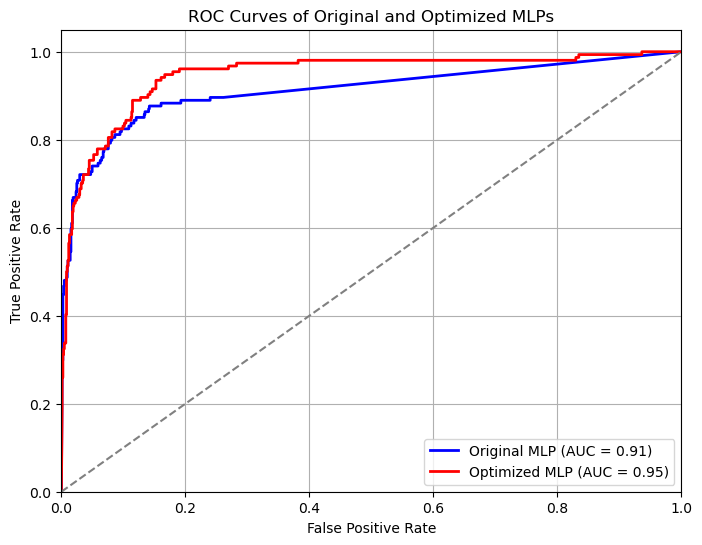

In [34]:
# Part 7

b_mlp = MLPClassifier(**grid_search.best_params_)
b_mlp.fit(X_train_scaled, y_train)

y_p_b = b_mlp.predict_proba(X_test_scaled)[:, 1]
fpr_b, tpr_b, _ = roc_curve(y_test, y_p_b)
auc_b = auc(fpr_b, tpr_b)

plt.figure(figsize=(8, 6))
plt.plot(fpr_orig, tpr_orig, color='blue', lw=2, label=f'Original MLP (AUC = {auc_orig:.2f})')
plt.plot(fpr_b, tpr_b, color='red', lw=2, label=f'Optimized MLP (AUC = {auc_b:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Original and Optimized MLPs')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

<span style="color:green">NP: Correct! Good job! </span>